## [Coodesh] Data Challenge

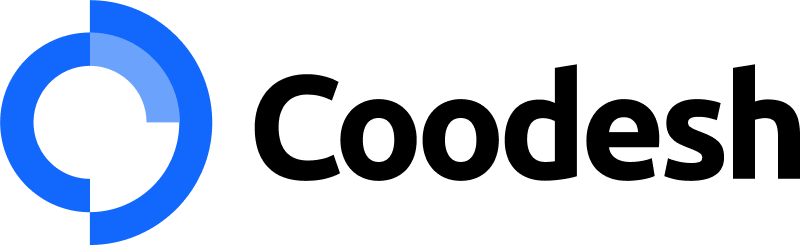

Este notebook é challenge by coodesh que tem como objetivo analisar certas bases de dados disponibizadas pelo autor do desafio.<br>
Notebook desenvolvido por: **Alisson de Souza Louly.**

In [146]:
#Importando bibliotecas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable as stb
import datetime
import calendar



## Carregar os arquivos

In [147]:
#Importando a base de dados da netflix
netflix= pd.read_csv('./data/netflix_titles.csv')
netflix.head(3)

show_id     type                 title         director  \
0      s1    Movie  Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show         Blood & Water              NaN   
2      s3  TV Show             Ganglands  Julien Leclercq   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...

In [148]:
#Importando a base de dados da amazon
amazon = pd.read_csv('./data/amazon_prime_titles.csv')
amazon.head(3)

show_id   type                 title      director  \
0      s1  Movie   The Grand Seduction  Don McKellar   
1      s2  Movie  Take Care Good Night  Girish Joshi   
2      s3  Movie  Secrets of Deception   Josh Webber   

                                                cast        country  \
0     Brendan Gleeson, Taylor Kitsch, Gordon Pinsent         Canada   
1   Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar          India   
2  Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...  United States   

       date_added  release_year rating duration                listed_in  \
0  March 30, 2021          2014    NaN  113 min            Comedy, Drama   
1  March 30, 2021          2018    13+  110 min     Drama, International   
2  March 30, 2021          2017    NaN   74 min  Action, Drama, Suspense   

                                         description  
0  A small fishing village must procure a local d...  
1  A Metro Family decides to fight a Cyber Crimin...  
2  After a man discovers his wife is cheating on ...

In [149]:
amazon[['show_id']]

show_id
0         s1
1         s2
2         s3
3         s4
4         s5
...      ...
9663   s9664
9664   s9665
9665   s9666
9666   s9667
9667   s9668

[9668 rows x 1 columns]

In [150]:
netflix[['show_id']]

show_id
0         s1
1         s2
2         s3
3         s4
4         s5
...      ...
8802   s8803
8803   s8804
8804   s8805
8805   s8806
8806   s8807

[8807 rows x 1 columns]

Checkando as colunas de id das duas bases

In [151]:
amazon.show_id = 'A'+amazon.show_id

In [152]:
netflix.show_id = 'N'+netflix.show_id

In [153]:
amazon[['show_id']]

show_id
0        As1
1        As2
2        As3
3        As4
4        As5
...      ...
9663  As9664
9664  As9665
9665  As9666
9666  As9667
9667  As9668

[9668 rows x 1 columns]

Adicionando um 'A' para os ids da base da Amazon e adicionando um 'N' para a base da Netflix para facilitar identificação posteriomente

## Mesclar os arquivos

In [154]:
df = pd.concat([netflix,amazon],ignore_index=True).drop_duplicates(subset=['title'], ignore_index=True)
df.head(5)

show_id     type                  title         director  \
0     Ns1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1     Ns2  TV Show          Blood & Water              NaN   
2     Ns3  TV Show              Ganglands  Julien Leclercq   
3     Ns4  TV Show  Jailbirds New Orleans              NaN   
4     Ns5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [155]:
df.stb.counts()

count  unique  \
type          18086       2   
rating        17756      29   
release_year  18086     100   
duration      18083     243   
country        8615     783   
listed_in     18086    1016   
date_added     8946    1785   
director      13464    9585   
cast          16050   15232   
description   18086   17802   
show_id       18086   18086   
title         18086   18086   

                                                      most_freq  \
type                                                      Movie   
rating                                                    TV-MA   
release_year                                               2021   
duration                                               1 Season   
country                                           United States   
listed_in                                                 Drama   
date_added                                      January 1, 2020   
director                                            Mark Knight   
cast                                             Maggie Binkley   
description   Arpo was designed as a commando robot, built a...   
show_id                                                     Ns1   
title                                      Dick Johnson Is Dead   

              most_freq_count  \
type                    13647   
rating                   3280   
release_year             2011   
duration                 3094   
country                  3059   
listed_in                 951   
date_added                109   
director                  113   
cast                       56   
description                15   
show_id                     1   
title                       1   

                                                     least_freq  \
type                                                    TV Show   
rating                                                   66 min   
release_year                                               1924   
duration                                                214 min   
country                                United States, Indonesia   
listed_in                             Action, Fantasy, Suspense   
date_added                                      October 7, 2017   
director                                       Daniela De Carlo   
cast          Kate Winslet, Liam Hemsworth, Judy Davis, Hugo...   
description   Billie Clark is twenty, smart and pretty. She'...   
show_id                                                     Ns1   
title                                      Dick Johnson Is Dead   

              least_freq_count  
type                      4439  
rating                       1  
release_year                 1  
duration                     1  
country                      1  
listed_in                    1  
date_added                   1  
director                     1  
cast                         1  
description                  1  
show_id                      1  
title                        1

In [156]:
df.stb.missing()

missing  total    percent
country          9471  18086  52.366471
date_added       9140  18086  50.536326
director         4622  18086  25.555678
cast             2036  18086  11.257326
rating            330  18086   1.824616
duration            3  18086   0.016587
show_id             0  18086   0.000000
type                0  18086   0.000000
title               0  18086   0.000000
release_year        0  18086   0.000000
listed_in           0  18086   0.000000
description         0  18086   0.000000

Verificando se o título é único, quantidade de dados faltando e outras informações.

## Análise exploratória dos dados

###  Top 10 atores/atrizes considerando todos os dados;

In [157]:
df[['cast']].head(6)

cast
0                                                NaN
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                NaN
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...

Como os cast é formado por uma lista de atores, podendo um ator participar de vários filmes diferentes

In [158]:
atores = df['cast'].str.split(',').explode().str.strip(' ').value_counts().head(11).rename_axis('Ator/Atriz').reset_index(name='counts')
atores[atores['Ator/Atriz']!='1'].reset_index(drop=True)


Ator/Atriz  counts
0       Anupam Kher      57
1    Maggie Binkley      56
2  Amitabh Bachchan      44
3            Nassar      42
4      Akshay Kumar      40
5    Shah Rukh Khan      40
6  Naseeruddin Shah      38
7      Paresh Rawal      38
8       Danny Trejo      36
9           Om Puri      34

**Os 10 atores com mais participação nos conteúdos das platoformas.**

###  Top 5 países produtores de conteúdos considerando todos os dados e comparando as duas plataformas;

In [159]:
df['country'].unique()[1:20]

array(['South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States'], dtype=object)

Uma produção pode ser oriunda de diversos países como pode ser visto na lista acima

In [160]:
df['country'].str.split(',').explode().str.strip(' ').value_counts().head(5).rename_axis('País').reset_index(name='counts')

País  counts
0   United States    4005
1           India    1279
2  United Kingdom     870
3          Canada     478
4          France     411

**Os 5 países com mais produções considerando todos os dados.**

In [161]:
a_country = amazon['country'].str.split(',').explode().str.strip(' ').value_counts().rename_axis('País').reset_index(name='counts')

In [162]:
n_country=netflix['country'].str.split(',').explode().str.strip(' ').value_counts().rename_axis('País').reset_index(name='counts')

In [163]:
a_country.merge(n_country, on ='País', how = 'outer')\
      .rename(columns={'counts_x':'Amazon','counts_y':'Netflix'})\
         .sort_values(by='Netflix',ascending= False).head(5)

País  Amazon  Netflix
0   United States   334.0   3690.0
1           India   246.0   1046.0
2  United Kingdom    67.0    806.0
3          Canada    35.0    445.0
4          France    20.0    393.0

**Os 5 países com mais produções da Amazon e da Netflix, importante resaltar que na base da Amazon a coluna de país tem 93.04% de dados faltantes.**

### Mês no qual há mais adições de filmes na plataforma Netflix;

In [164]:
df[['date_added']]

date_added
0      September 25, 2021
1      September 24, 2021
2      September 24, 2021
3      September 24, 2021
4      September 24, 2021
...                   ...
18081                 NaN
18082                 NaN
18083                 NaN
18084                 NaN
18085                 NaN

[18086 rows x 1 columns]

In [165]:
df['date_added']=pd.to_datetime(df['date_added'])
df[['date_added']]

date_added
0     2021-09-25
1     2021-09-24
2     2021-09-24
3     2021-09-24
4     2021-09-24
...          ...
18081        NaT
18082        NaT
18083        NaT
18084        NaT
18085        NaT

[18086 rows x 1 columns]

In [166]:
#Criando a coluna com mês de inserção na base 
df['month_added'] = df['date_added'].dt.month
meses={1:'Janeiro',2:'Fevereiro',3:'Março',4:'Abril',5:'Maio',6:'Junho',7:'Julho',8:'Agosto',9:'Setembro',10:'Outubro',11:'Novembro',12:'Dezembro'}
df['month_added']=df['month_added'].map(meses)

In [167]:
df[(df.show_id.str.startswith("N"))&(df.type=='Movie')]['month_added'].value_counts()


Julho        565
Abril        550
Dezembro     547
Janeiro      546
Outubro      545
Março        529
Setembro     519
Agosto       519
Novembro     498
Junho        492
Maio         439
Fevereiro    382
Name: month_added, dtype: int64

**Julho é o mês com mais adições de filmes na plataforma Netflix.**

### Quantidade de filmes listados como comédia?

In [168]:
df[df['type']=='Movie']['listed_in'].str.split(',').explode().str.strip(' ').value_counts().rename_axis('type').reset_index(name='counts')['type'].unique()

array(['Drama', 'International Movies', 'Dramas', 'Comedy', 'Comedies',
       'Action', 'Suspense', 'Documentaries', 'Action & Adventure',
       'Horror', 'Independent Movies', 'Special Interest', 'Kids',
       'Documentary', 'Children & Family Movies', 'Romantic Movies',
       'Thrillers', 'Romance', 'and Culture', 'Entertainment', 'Arts',
       'Science Fiction', 'Music & Musicals', 'Horror Movies',
       'Stand-Up Comedy', 'Animation', 'International',
       'Sci-Fi & Fantasy', 'Sports Movies', 'Western', 'Adventure',
       'Music Videos and Concerts', 'Arthouse', 'Classic Movies',
       'LGBTQ Movies', 'Sports', 'LGBTQ', 'Fitness', 'Anime Features',
       'Cult Movies', 'Young Adult Audience', 'Faith & Spirituality',
       'Movies', 'Faith and Spirituality', 'Fantasy', 'Military and War',
       'Anime', 'Historical', 'Talk Show and Variety'], dtype=object)

Olhando a lista de gêneros é possível identificar que comédias estão classificadas como 'Comedy' e 'Comedies'

In [169]:
generos = df[df['type']=='Movie']['listed_in'].str.split(',').explode().str.strip(' ').value_counts().rename_axis('type').reset_index(name='counts')

In [170]:
#Deixando apenas a grafia Comedy para o gênero comédia
generos['type'] = np.where(generos['type']=='Comedies', 'Comedy', generos['type'])
generos=generos.groupby('type').sum().reset_index()
generos[generos['type']=='Comedy']    

type  counts
10  Comedy    3407

**Há 3407 filmes listados como comédia em toda a base.**

### Lista de todos os gêneros de filmes

In [171]:
df[df['type']=='Movie']['listed_in'].str.split(',').explode().str.strip(' ').value_counts().rename_axis('type').reset_index(name='counts')['type'].unique()

array(['Drama', 'International Movies', 'Dramas', 'Comedy', 'Comedies',
       'Action', 'Suspense', 'Documentaries', 'Action & Adventure',
       'Horror', 'Independent Movies', 'Special Interest', 'Kids',
       'Documentary', 'Children & Family Movies', 'Romantic Movies',
       'Thrillers', 'Romance', 'and Culture', 'Entertainment', 'Arts',
       'Science Fiction', 'Music & Musicals', 'Horror Movies',
       'Stand-Up Comedy', 'Animation', 'International',
       'Sci-Fi & Fantasy', 'Sports Movies', 'Western', 'Adventure',
       'Music Videos and Concerts', 'Arthouse', 'Classic Movies',
       'LGBTQ Movies', 'Sports', 'LGBTQ', 'Fitness', 'Anime Features',
       'Cult Movies', 'Young Adult Audience', 'Faith & Spirituality',
       'Movies', 'Faith and Spirituality', 'Fantasy', 'Military and War',
       'Anime', 'Historical', 'Talk Show and Variety'], dtype=object)

### A frequência de "TV Show" e "Movie" de todos os dados e comparativamente em relação as duas plataformas

In [172]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [173]:
data = df['type'].value_counts().reset_index()
amazon_2 = amazon['type'].value_counts().reset_index()
netflix_2 = netflix['type'].value_counts().reset_index()

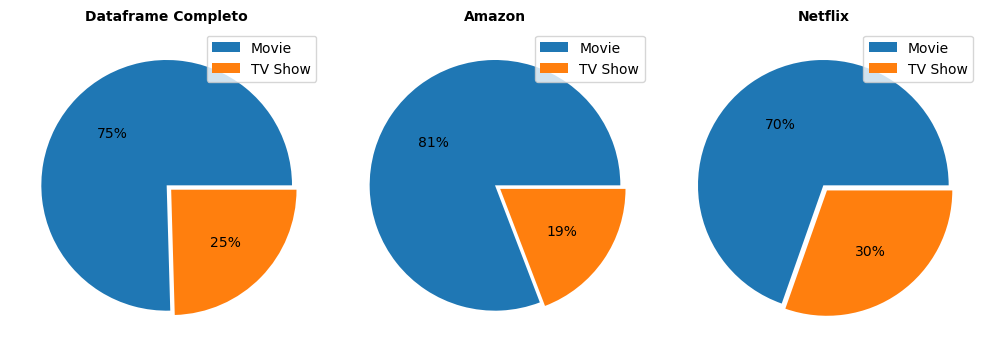

In [174]:
explode = (0, 0.05)
fig, axs = plt.subplots(1,3,figsize=(10,5))
axs[0].pie(data['type'],  autopct='%1.0f%%',explode=explode)
axs[0].legend(data['index'],loc='upper right')
axs[0].set_title('Dataframe Completo',fontsize=10,fontweight = 'bold')
axs[1].pie(amazon_2['type'] ,  autopct='%1.0f%%',explode=explode)
axs[1].legend(amazon_2['index'])
axs[1].set_title('Amazon',fontsize=10,fontweight = 'bold')
axs[2].pie(netflix_2['type'],  autopct='%1.0f%%',explode=explode)
axs[2].legend(netflix_2['index'])
axs[2].set_title('Netflix',fontsize=10,fontweight = 'bold')
plt.tight_layout()
plt.show()